# Instructions

Create a class for a checking account that tracks __the current balance of an account__ and __the number of checks available__. It should have the following methods and properties:

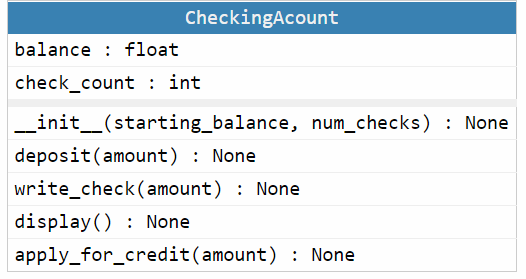

We will create the following exception classes:

> * BalanceError  
> * OutOfChecksError

Then, we will also use the following built-in exception classes:

> * ValueError  
> * NotImplementedError

## Core Requirements

Begin with a supplied main function that will allow the user to create an account and call the various functions associated with it:

In [1]:
class BalanceError(Exception):
    
    def __init__(self):
        super().__init__("Balance should be positive")
        
class OutOfChecksError(Exception):
    
    def __init__(self):
        super().__init__("There is no more check!")
        

In [2]:
class CheckingAccount:
    
    def __init__(self, starting_balance, num_checks):
        try:
            self.starting_balance = float(starting_balance)           
            self.num_checks = int(num_checks)
            if self.starting_balance < 0: 
                raise BalanceError()
        except ValueError as e:
            print(e)
        except BalanceError as e:
            print(e)
        
    def deposit(self, amount):
        self.starting_balance += amount
    
    def write_check(self, amount):
        
        try:
            self.starting_balance -= amount
            if self.starting_balance < 0:
                raise BalanceError()
        
            self.num_checks -= 1
            if self.num_checks < 1:
                raise OutOfChecksError()
        
        except BalanceError as e:
            print(e)
        
        except OutOfChecksError as e:
            print(e)
            question = input("would like to buy more checks? (y/n)")
            if question == "y":
                self.num_checks += 25
                self.starting_balance -= 5
            
    def display(self):
        print("The current balance: {}".format(self.starting_balance))
        print("The number of checks: {}".format(self.num_checks))
    
    def apply_for_credit(self, amount):
        pass

In [ ]:
def display_menu():
    """
    Displays the available commands.
    """
    print()
    print("Commands:")
    print("  quit - Quit")
    print("  new - Create new account")
    print("  display - Display account information")
    print("  deposit - Desposit money")
    print("  check - Write a check")


def main():
    """
    Used to test the CheckingAccount class.
    """
    acc = None
    command = ""

    while command != "quit":
        display_menu()
        command = input("Enter a command: ")

        if command == "new":
            balance = float(input("Starting balance: "))
            num_checks = int(input("Numbers of checks: "))
            acc = CheckingAccount(balance, num_checks)
        elif command == "display":
            acc.display()
        elif command == "deposit":
            amount = float(input("Amount: "))
            acc.deposit(amount)
        elif command == "check":
            amount = float(input("Amount: "))
            acc.write_check(amount)
        elif command == "credit":
            amount = float(input("Amount: "))
            acc.apply_for_credit(amount)


if __name__ == "__main__":
    main()


Commands:
  quit - Quit
  new - Create new account
  display - Display account information
  deposit - Desposit money
  check - Write a check
Enter a command: new
Starting balance: -10
Numbers of checks: 5
Balance should be positive

Commands:
  quit - Quit
  new - Create new account
  display - Display account information
  deposit - Desposit money
  check - Write a check
Enter a command: deposit
Amount: 1000

Commands:
  quit - Quit
  new - Create new account
  display - Display account information
  deposit - Desposit money
  check - Write a check
Enter a command: dispaly

Commands:
  quit - Quit
  new - Create new account
  display - Display account information
  deposit - Desposit money
  check - Write a check
Enter a command: display
The current balance: 990.0
The number of checks: 5

Commands:
  quit - Quit
  new - Create new account
  display - Display account information
  deposit - Desposit money
  check - Write a check
Enter a command: check
Amount: 1000
Balance should be p

> 1. Create a `CheckingAccount` class as defined above. It should be initialized to __an initial balance__ and __a number of checks__ as passed in to the __\_\_init\_\_()__ function.  
> <br>The `deposit` method should increase the balance by the amount passed in. The `write_check` method should decrease the balance by the amount given and decrease the number of checks by 1.  
> <br>The `display` method should display the current balance and the number of checks.  
> <br>The `apply_for_credit` method can be left blank (i.e., "pass").  
> <br>Run the program, try each method, and verify that they work as expected.

> 2. Create classes for the exceptions `BalanceError` and `OutOfChecksError`. They should each inherit from the `Exception` class, and should accept a message as a parameter to the __\_\_init\_\___ function. This message should then be passed to the __\_\_init\_\___ function of the super class.  
> <br> Add logic to the CheckingAccount __\_\_init\_\___ function and to the `write_check` function to raise an appropriate BalanceError if the resulting balance would be negative.  
> <br> Also, add logic to the CheckingAccount `write_check` function to raise an `OutOfChecksError` if there are no more checks.  
> <br> Test your code to ensure that the exceptions are raised as expected.

> 3. Handle the exceptions you raised above in main so that the program does not crash. If an `BalanceError` is caught, display the message. If an `OutOfChecks` error is caught. Ask the user if they would like to buy more checks. If so, add 25 checks and deduct \$5.00 from the balance.  
> <br> Verify that the these exceptions are properly handled.

## Stretch Challenges

> 1. Raise a `ValueError` in deposit and write_check if the amount is negative. Raise a `NotImplementedError` in the `apply_for_credit`. Make sure to provide appropriate messages. Then, handle them in main. Verify that they work correctly.

> 2. Change balance to a `property` (think getter / setter) and make sure exceptions are appropriately raised if an attempt is made to set the balance to a negative number.

> 3. Add an overage amount as a member variable to the `BalanceError` class. Then, set this amount whenever a `BalanceError` is raised. When handling the error, inform the use of how far over the balance they would have gone.